In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
force_file_path = '../dataset/GP1_0.6_force.csv'
marker_file_path = '../dataset/GP1_0.6_marker.csv'

# Load the datasets
force_data = pd.read_csv(force_file_path)
marker_data = pd.read_csv(marker_file_path)


In [5]:
force_data.head()

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z
0,0.0,-9.537293,0.0,30.241894,0.0,777.790222
1,0.0,-8.993257,0.0,30.251348,0.0,777.832886
2,0.0,-8.459884,0.0,30.250864,0.0,777.852966
3,0.0,-7.937055,0.0,30.241360,0.0,777.852539
4,0.0,-7.424666,0.0,30.223719,0.0,777.833374


In [6]:
marker_data.head()

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,...,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,...,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,...,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,...,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,...,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


In [11]:
display(force_data.shape)
display(marker_data.shape)

(60000, 6)

(12000, 24)

### Preprocessing

In [12]:
# Combine the datasets
# To simplify, we'll concatenate the force and marker data along the feature axis
combined_data = pd.concat([force_data, marker_data], axis=1)

# Generating synthetic binary labels for demonstration (1 = Normal, 0 = Abnormal)
# Here, we'll randomly assign labels for demonstration purposes (since our data is not labeled in that way)
np.random.seed(42)  # Ensure reproducibility
combined_data['label'] = np.random.choice([0, 1], size=combined_data.shape[0])


### Data Cleaning

In [14]:
# Check for missing values
print("Missing values in each column:\n", combined_data.isnull().sum())

# Drop rows with missing values if any (or impute based on the context)
combined_data.dropna(inplace=True)
# Check for duplicates
print("\nNumber of duplicate rows:", combined_data.duplicated().sum())

# Remove duplicates if any
# combined_data = combined_data.drop_duplicates()

Missing values in each column:
 FP1_x          0
FP2_x          0
FP1_y          0
FP2_y          0
FP1_z          0
FP2_z          0
L_FCC_x    48000
L_FM1_x    48000
L_FM2_x    48000
L_FM5_x    48000
R_FCC_x    48000
R_FM1_x    48000
R_FM2_x    48000
R_FM5_x    48000
L_FCC_y    48000
L_FM1_y    48000
L_FM2_y    48000
L_FM5_y    48000
R_FCC_y    48000
R_FM1_y    48000
R_FM2_y    48000
R_FM5_y    48000
L_FCC_z    48000
L_FM1_z    48000
L_FM2_z    48000
L_FM5_z    48000
R_FCC_z    48000
R_FM1_z    48000
R_FM2_z    48000
R_FM5_z    48000
label          0
dtype: int64

Number of duplicate rows: 0


### Exploratory Data Analysis

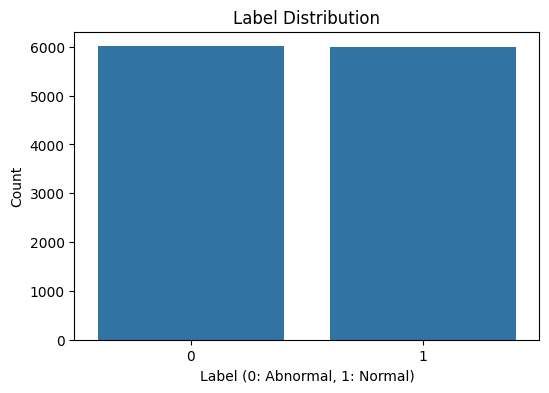

In [15]:
# Visualize the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=combined_data['label'])
plt.title("Label Distribution")
plt.xlabel("Label (0: Abnormal, 1: Normal)")
plt.ylabel("Count")
plt.show()

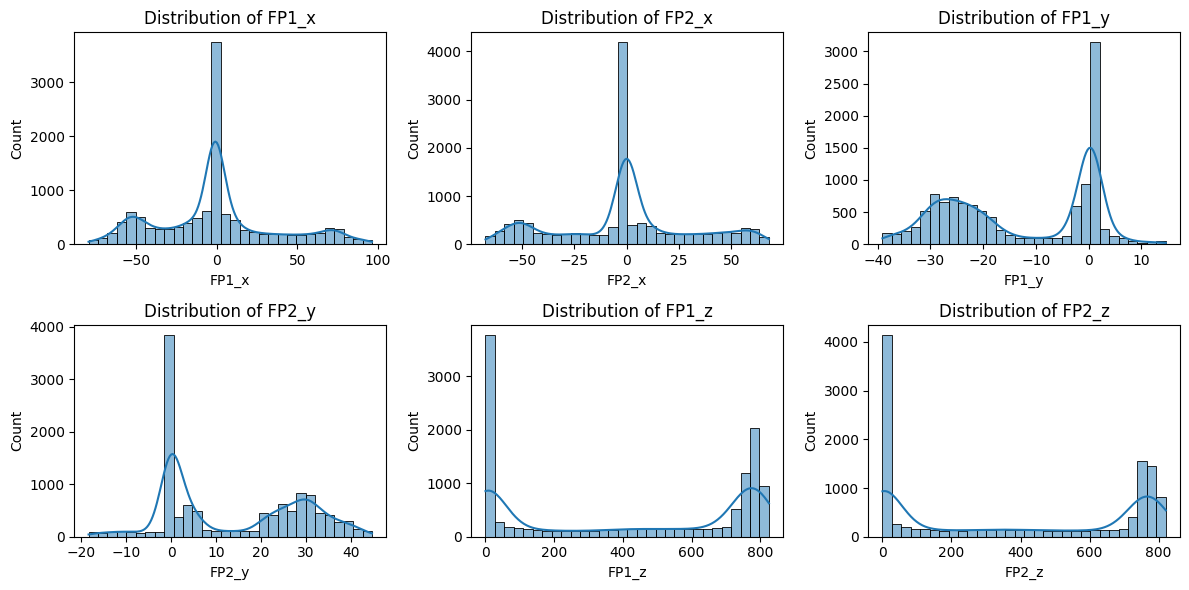

In [16]:
# Visualize the distribution of a few features
plt.figure(figsize=(12, 6))
for i, col in enumerate(combined_data.columns[:6], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(combined_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

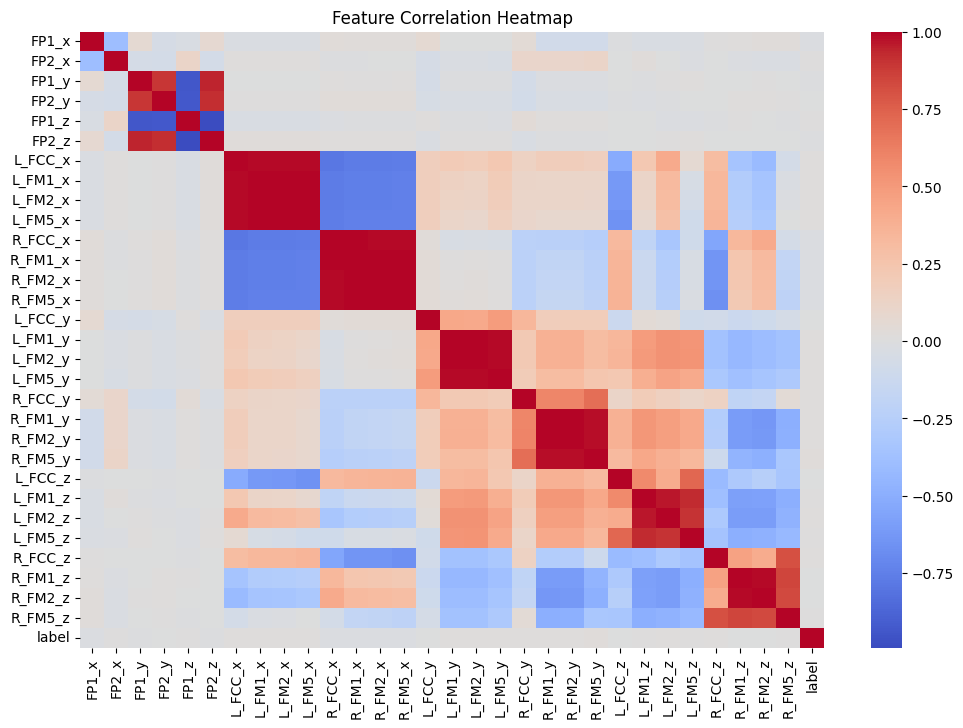

In [17]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Check for highly correlated features (absolute correlation > 0.9)
high_corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # Exclude self-correlation
print("\nHighly correlated features:\n")
high_corr_pairs[high_corr_pairs > 0.9].head(10)


Highly correlated features:



R_FM1_x  R_FM2_x    0.999937
R_FM2_x  R_FM1_x    0.999937
L_FM2_x  L_FM1_x    0.999842
L_FM1_x  L_FM2_x    0.999842
L_FM2_y  L_FM1_y    0.999765
L_FM1_y  L_FM2_y    0.999765
R_FM2_x  R_FM5_x    0.999670
R_FM5_x  R_FM2_x    0.999670
R_FM2_y  R_FM1_y    0.999512
R_FM1_y  R_FM2_y    0.999512
dtype: float64

### Feature Scaling

In [21]:
# Separating features and labels
features = combined_data.drop('label', axis=1)
labels = combined_data['label']

# Normalize the feature set using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for better interpretability
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Displaying a sample of the preprocessed dataset
features_scaled.head()

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,0.041145,-0.250483,0.96676,1.062462,-1.19973,1.173756,1.071243,1.066949,1.026836,0.985403,...,0.979936,0.848004,-0.478627,0.729956,1.096500,0.548208,-0.558552,-0.934959,-1.009310,-0.741509
1,0.041145,-0.233546,0.96676,1.063074,-1.19973,1.173881,1.096506,1.090906,1.051522,1.011932,...,0.977609,0.844904,-0.485376,0.841457,1.207298,0.623934,-0.555999,-0.937472,-1.010746,-0.745233
2,0.041145,-0.216941,0.96676,1.063042,-1.19973,1.173940,1.123004,1.115908,1.077299,1.039664,...,0.974984,0.841523,-0.492063,0.960375,1.324504,0.704028,-0.553237,-0.939918,-1.012326,-0.749084
3,0.041145,-0.200664,0.96676,1.062427,-1.19973,1.173938,1.150450,1.141639,1.103851,1.068284,...,0.972240,0.837859,-0.498515,1.085677,1.446947,0.787690,-0.550284,-0.942166,-1.014194,-0.753124
4,0.041145,-0.184712,0.96676,1.061286,-1.19973,1.173882,1.178509,1.167783,1.130849,1.097444,...,0.969197,0.833985,-0.504624,1.216396,1.573455,0.874243,-0.547108,-0.944216,-1.016276,-0.757291


In [28]:
# Train a RandomForestClassifier model
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

display(conf_matrix)


array([[908, 900],
       [932, 860]])

In [30]:
accuracy_score(y_test, y_pred)

0.4911111111111111

In [26]:
print(class_report)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1808
           1       0.49      0.48      0.48      1792

    accuracy                           0.49      3600
   macro avg       0.49      0.49      0.49      3600
weighted avg       0.49      0.49      0.49      3600



### Logistic Regression (Modeling)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.49722222222222223

Confusion Matrix:
 [[825 983]
 [827 965]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48      1808
           1       0.50      0.54      0.52      1792

    accuracy                           0.50      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.50      0.50      0.50      3600

